In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
globalCo2 = pd.read_csv("/content/gdrive/My Drive/Copie de _grx5 C02 global.xlsx - Feuille 1.csv")
temp = pd.read_csv("/content/gdrive/My Drive/exportMergeTempEarthGlobal.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
globalCo2.head()

Year  Total CO2 Emissions  (MtCO2)
0  1850                           198
1  1851                           198
2  1852                           209
3  1853                           216
4  1854                           253

In [0]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = globalCo2['Year'] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = globalCo2['Total CO2 Emissions  (MtCO2)']

In [5]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

polymodel = np.polyfit(x = Xaxis, y = Yaxis, deg = 2)


print("What's the type of this model ?, ", type(polymodel))
print("What's inside ?, ", polymodel)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(polymodel[0], 1) ," * x  +  ", round(polymodel[1], 1) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [ 1.94185962e+00 -7.32267156e+03  6.90343764e+06]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
1.9  * x  +   -7322.7


In [6]:
# You can "predict" the Max CO2 from your column and the equation
# For example, let's try if your column value is 2010.

# Hand calculation :
print("By hand :", polymodel[0] * 2010 + polymodel[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(2010)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [1850, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest)   )

By hand : -3419.5337333881657
NumPy :   30174.834359850734
NumPy list of values :   [ 8149.28314807 10849.27854142 13937.64585822 17414.38509846
 21279.49626215 25532.97934928 30174.83435985 35205.06129387]


In [0]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()             # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)

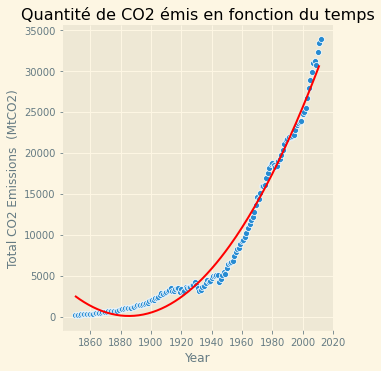

In [11]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis
import matplotlib.pyplot as plt

with plt.style.context('Solarize_Light2'):
  sns.relplot(x='Year', y='Total CO2 Emissions  (MtCO2)', data= globalCo2)
  plt.plot(array, np.poly1d(polymodel)(array), c='red')
  plt.title('Quantité de CO2 émis en fonction du temps')
  plt.show()

In [0]:
#####################################################################
#Du coup on peut chercher des valeurs estimés de quantité de C02 pour des dates ultérieure.
 #( a remettre ensuite dans l'autre modèle pour chercher températures estimés cette fois-ci.)

In [27]:
# You can "predict" the Max CO2 from your column and the equation
# For example, let's try if your column value is 2010.

# Hand calculation :
print("By hand :", polymodel[0] * 2010 + polymodel[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(2010)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [1850, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
print("NumPy list of values :  ", np.poly1d(polymodel)(listtest)   )

By hand : -3419.5337333881657
NumPy :   30174.834359850734
NumPy list of values :   [ 2509.785004   40623.66015133 46430.63093224 52625.9736366
 59209.68826439 66181.77481564 73542.23329032 81291.06368845
 89428.26601003]
